In [1]:
# SNEMI Notebook
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '/home/nvidia/vismed/data'
# Load training data
with h5py.File(os.path.join(DATA_PATH, 'AC4_inputs.h5'), 'r') as f:
    train_image = f['main'][:]
with h5py.File(os.path.join(DATA_PATH, 'AC4_labels.h5'), 'r') as f:
    train_label = f['main'][:]

print(f"Image shape: {train_image.shape}")
print(f"Label shape: {train_label.shape}")

Image shape: (100, 1024, 1024)
Label shape: (100, 1024, 1024)


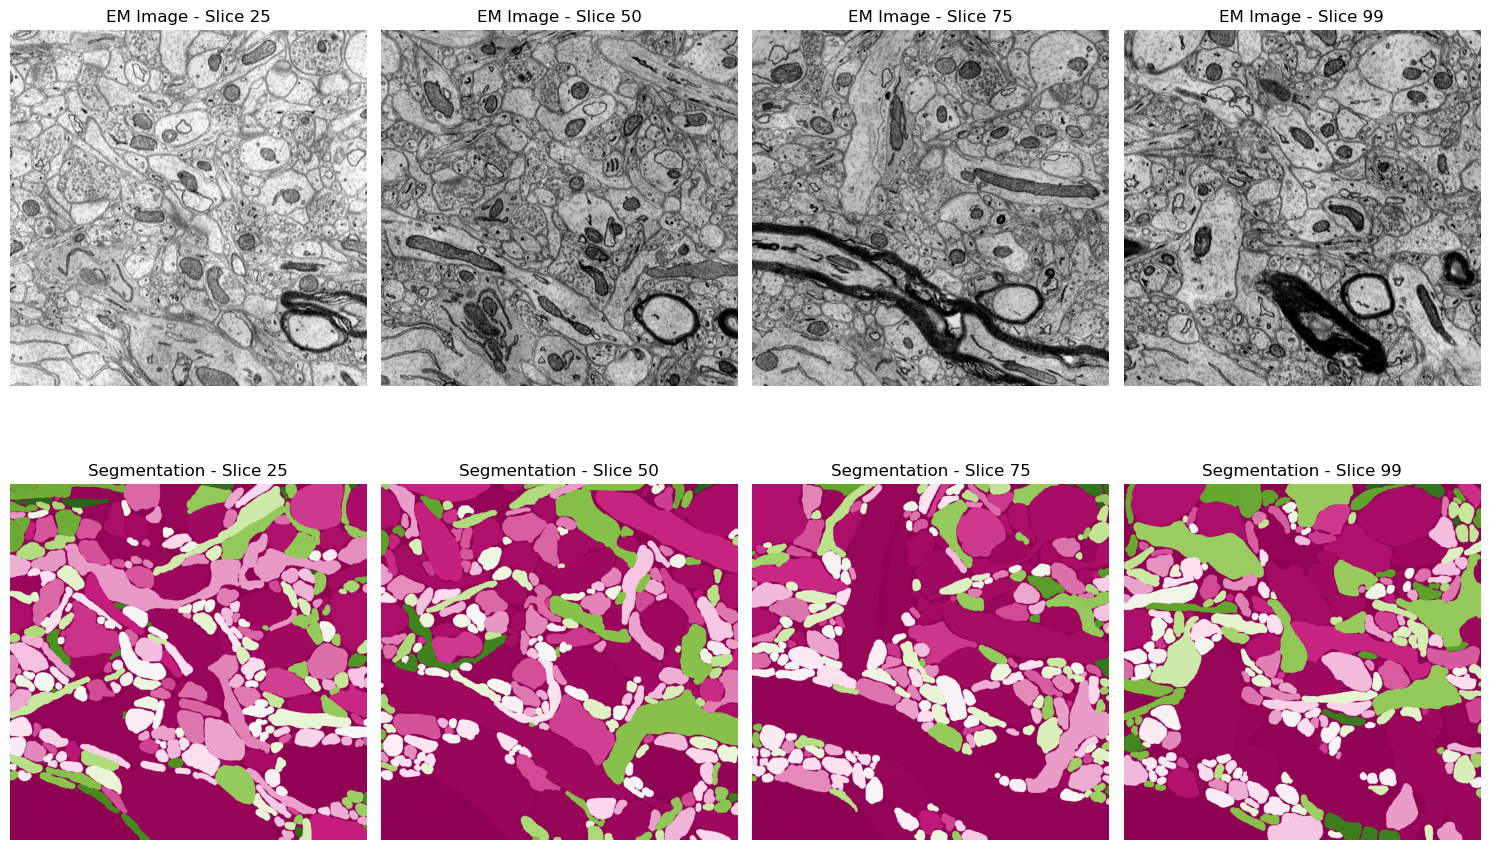

In [2]:
# Visualize input image and segmentation
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Select three different slices to visualize
slice_indices = [25, 50, 75, 99]

for i, slice_idx in enumerate(slice_indices):   
    # Original EM image
    axes[0, i].imshow(train_image[slice_idx], cmap='gray')
    axes[0, i].set_title(f'EM Image - Slice {slice_idx}')
    axes[0, i].axis('off')
    
    # Segmentation labels
    axes[1, i].imshow(train_label[slice_idx], cmap='PiYG')
    axes[1, i].set_title(f'Segmentation - Slice {slice_idx}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [3]:
# Read h5 files and save as TIFF
from PIL import Image
import tifffile

# File names to process
files_to_convert = [
    ('AC3_inputs.h5', 'AC3_inputs.tiff'),
    ('AC3_labels.h5', 'AC3_labels.tiff'),
    ('AC4_inputs.h5', 'AC4_inputs.tiff'),
    ('AC4_labels.h5', 'AC4_labels.tiff')
]

# Convert each file
for h5py_name, tiff_name in files_to_convert:
    h5py_path = os.path.join(DATA_PATH, h5py_name)
    tiff_path = os.path.join(DATA_PATH, tiff_name)
    
    # Read h5 file
    with h5py.File(h5py_path, 'r') as f:
        data = f['main'][:]
    
    # Save as TIFF (multi-page TIFF for 3D volumes)
    tifffile.imwrite(tiff_path, data)
    
    print(f"✓ Converted {h5py_name} -> {tiff_name} | Shape: {data.shape}, Dtype: {data.dtype}")

print("\nAll files converted successfully!")


✓ Converted AC3_inputs.h5 -> AC3_inputs.tiff | Shape: (100, 1024, 1024), Dtype: uint8
✓ Converted AC3_labels.h5 -> AC3_labels.tiff | Shape: (100, 1024, 1024), Dtype: uint16
✓ Converted AC4_inputs.h5 -> AC4_inputs.tiff | Shape: (100, 1024, 1024), Dtype: uint8
✓ Converted AC4_labels.h5 -> AC4_labels.tiff | Shape: (100, 1024, 1024), Dtype: uint16

All files converted successfully!
